# Taxi Driver Jupiter
## Imports and init the env

In [1]:
import gymnasium as gym
import pygame

In [2]:
pygame.init()
env = gym.make('Taxi-v3')
# env = gym.make('Taxi-v3', render_mode="human")
state, info = env.reset()
HUMAN_HAS_PLAYER_MODE = False

## Running episodes
**episode_counter**:    counter for the number of tries
**episode_limit**:      the number of episodes in an epoch
**time_spent**:         number of actions the agent took (or time spent in an episode)
**time_limit**:         limit of time for the episode to fail
**results**:            the output of the run

In [3]:
episode_counter = 0
episode_limit = 1000
time_spent = 0
time_limit = 50
results = {}
while episode_counter < episode_limit:

    # end of episode_counter if true
    terminated = False
    # total reward of an agent for an episode_counter
    episode_reward = 0
    # time spent in the episode
    time_spent = 0

    while (terminated is not True) and (time_spent < time_limit):

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        if HUMAN_HAS_PLAYER_MODE:
            action = input("action")
        else:
            # get an action in the action_mask array of the agent:
            # 0: Move south (down)

            # 1: Move north (up)

            # 2: Move east (right)

            # 3: Move west (left)

            # 4: Pickup passenger

            # 5: Drop off passenger
            action = env.action_space.sample(info["action_mask"])
            # action = randint(0, 5)

        # get step results in different variables.
        observation, reward, terminated, truncated, info = env.step(int(action))
        # counts total episode's reward
        episode_reward += reward
        time_spent += 1

        # in you want to see outputs of the env.step() command:
        # print("observation:", observation, "reward:", reward, "terminated", terminated, "truncated", truncated, "info", info)

        # print episode's progress
        # print(str(time_spent)+"/"+str(time_limit))

        # terminated is True only if the passenger is dropped in his wanted location.
    # at each end of episode, record results in 
    results[str(episode_counter)] = {"is_finished": terminated, "episode_reward": episode_reward}

    # Clear terminal for a clear progress display
    # clear_output(wait=True)

    episode_counter += 1
    env.reset()
    print("Epoch: " + str(episode_counter) + " / " + str(episode_limit))


Epoch: 1 / 1000
Epoch: 2 / 1000
Epoch: 3 / 1000
Epoch: 4 / 1000
Epoch: 5 / 1000
Epoch: 6 / 1000
Epoch: 7 / 1000
Epoch: 8 / 1000
Epoch: 9 / 1000
Epoch: 10 / 1000
Epoch: 11 / 1000
Epoch: 12 / 1000
Epoch: 13 / 1000
Epoch: 14 / 1000
Epoch: 15 / 1000
Epoch: 16 / 1000
Epoch: 17 / 1000
Epoch: 18 / 1000
Epoch: 19 / 1000
Epoch: 20 / 1000
Epoch: 21 / 1000
Epoch: 22 / 1000
Epoch: 23 / 1000
Epoch: 24 / 1000
Epoch: 25 / 1000
Epoch: 26 / 1000
Epoch: 27 / 1000
Epoch: 28 / 1000
Epoch: 29 / 1000
Epoch: 30 / 1000
Epoch: 31 / 1000
Epoch: 32 / 1000
Epoch: 33 / 1000
Epoch: 34 / 1000
Epoch: 35 / 1000
Epoch: 36 / 1000
Epoch: 37 / 1000
Epoch: 38 / 1000
Epoch: 39 / 1000
Epoch: 40 / 1000
Epoch: 41 / 1000
Epoch: 42 / 1000
Epoch: 43 / 1000
Epoch: 44 / 1000
Epoch: 45 / 1000
Epoch: 46 / 1000
Epoch: 47 / 1000
Epoch: 48 / 1000
Epoch: 49 / 1000
Epoch: 50 / 1000
Epoch: 51 / 1000
Epoch: 52 / 1000
Epoch: 53 / 1000
Epoch: 54 / 1000
Epoch: 55 / 1000
Epoch: 56 / 1000
Epoch: 57 / 1000
Epoch: 58 / 1000
Epoch: 59 / 1000
Epoch:

## Display result and graphs

is_finished : False
episode_reward : -50
episode n° 0 

is_finished : False
episode_reward : -59
episode n° 1 

is_finished : False
episode_reward : -50
episode n° 2 

is_finished : False
episode_reward : -50
episode n° 3 

is_finished : False
episode_reward : -50
episode n° 4 

is_finished : False
episode_reward : -50
episode n° 5 

is_finished : False
episode_reward : -50
episode n° 6 

is_finished : False
episode_reward : -50
episode n° 7 

is_finished : False
episode_reward : -50
episode n° 8 

is_finished : False
episode_reward : -50
episode n° 9 

is_finished : False
episode_reward : -50
episode n° 10 

is_finished : False
episode_reward : -50
episode n° 11 

is_finished : False
episode_reward : -50
episode n° 12 

is_finished : False
episode_reward : -50
episode n° 13 

is_finished : False
episode_reward : -50
episode n° 14 

is_finished : False
episode_reward : -50
episode n° 15 

is_finished : False
episode_reward : -50
episode n° 16 

is_finished : False
episode_reward : -50


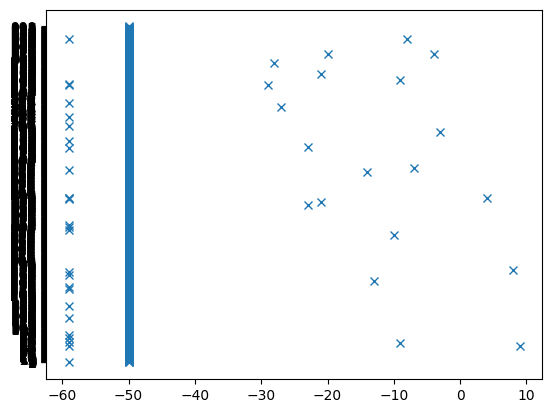

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# print(results)
episode_reward_list = []
win_counter = 0
episode_keys = []
for episode_key, result in results.items():
    episode_keys.append(episode_key)
    for column, value in result.items():
        if column == "episode_reward":
            episode_reward_list.append(value)

        if column == "is_finished":
            if value:
                win_counter += 1
        print(column, ":", value)
    print("episode n°", episode_key, '\n')
# print(episode_reward_list)
# print(episode_keys)
plt.plot(episode_reward_list, episode_keys, "x")

print("worst episode:", min(episode_reward_list))
print("best episode:", max(episode_reward_list))
print('win counter:', win_counter)

# plt.style.use('_mpl-gallery')
# 
# # make the data
# np.random.seed(3)
# x = episode_reward_list
# y = episode_keys
# # size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))
# 
# # plot
# fig, ax = plt.subplots()
# ax.scatter(x, y, s=50, c=colors, vmin=0, vmax=100)
# 
# ax.set(xlim=(0, 8), xticks=np.arange(0.999),
#        ylim=(0, 8), yticks=np.arange(-60, +20))
# 
# plt.show()